In [77]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import math

In [78]:
# Adding stock to the list of stocks and retreiving data for a period of 5 years
stocks = ['VEDL.NS', 'JINDALSTEL.NS', 'SAIL.NS',
          'TATASTEEL.NS', '^NSEI', 'JSWSTEEL.NS']
stock = yf.download(tickers=stocks, period='10y')
Portfolio = stock['Close']
Portfolio

[*********************100%%**********************]  6 of 6 completed


,JINDALSTEL.NS,JSWSTEEL.NS,SAIL.NS,TATASTEEL.NS,VEDL.NS,^NSEI
Date,,,,,,
2014-01-20,260.000000,98.699997,68.150002,35.684750,205.500000,6303.950195
2014-01-21,261.100006,99.074997,69.050003,36.546978,208.750000,6313.799805
2014-01-22,261.600006,99.455002,69.750000,37.466370,210.449997,6338.950195
2014-01-23,267.000000,99.425003,69.250000,37.085274,208.850006,6345.649902
2014-01-24,262.049988,97.004997,69.150002,35.822899,202.699997,6266.750000
...,...,...,...,...,...,...
2024-01-16,749.750000,832.299988,119.550003,137.250000,273.200012,22032.300781
2024-01-17,722.099976,812.650024,113.099998,131.649994,264.850006,21571.949219
2024-01-18,719.700012,803.650024,113.050003,131.000000,267.549988,21462.250000


In [79]:
Portfolio_return = Portfolio/Portfolio.shift(1)
Portfolio_return.drop(index=Portfolio_return.index[0], axis=0, inplace=True)
Portfolio_return

,JINDALSTEL.NS,JSWSTEEL.NS,SAIL.NS,TATASTEEL.NS,VEDL.NS,^NSEI
Date,,,,,,
2014-01-21,1.004231,1.003799,1.013206,1.024162,1.015815,1.001562
2014-01-22,1.001915,1.003836,1.010138,1.025156,1.008144,1.003983
2014-01-23,1.020642,0.999698,0.992832,0.989828,0.992397,1.001057
2014-01-24,0.981461,0.975660,0.998556,0.965960,0.970553,0.987566
2014-01-27,0.968136,0.942941,0.973970,0.940292,0.962260,0.979112
...,...,...,...,...,...,...
2024-01-16,1.019999,1.008665,1.042739,1.017420,1.000733,0.997052
2024-01-17,0.963121,0.976391,0.946048,0.959198,0.969436,0.979106
2024-01-18,0.996676,0.988925,0.999558,0.995063,1.010194,0.994915


,JINDALSTEL.NS,JSWSTEEL.NS,SAIL.NS,TATASTEEL.NS,VEDL.NS,^NSEI
JINDALSTEL.NS,1.000000,0.637199,0.636085,0.664697,0.512671,0.535397
JSWSTEEL.NS,0.637199,1.000000,0.636554,0.710337,0.522049,0.601141
SAIL.NS,0.636085,0.636554,1.000000,0.726828,0.564139,0.551654
TATASTEEL.NS,0.664697,0.710337,0.726828,1.000000,0.613860,0.588931
VEDL.NS,0.512671,0.522049,0.564139,0.613860,1.000000,0.523186
^NSEI,0.535397,0.601141,0.551654,0.588931,0.523186,1.000000


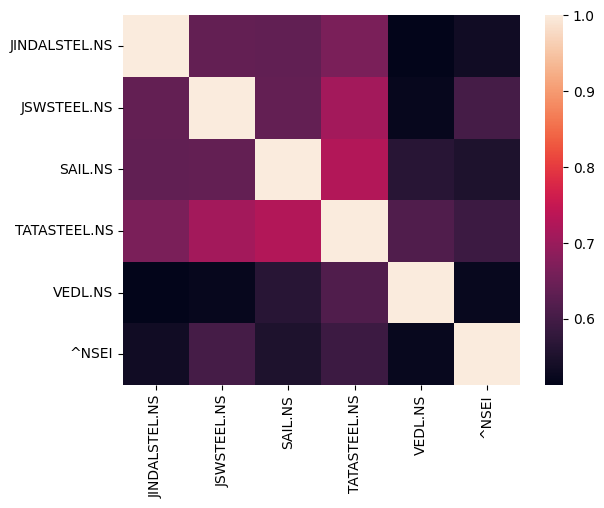

In [80]:
# Covariance heatmaps for the stocks and the standard NIFTY-Index
# Calculating the correlation of the portfolio and to keep it low for a simple strategy
Portfolio_corr = Portfolio_return.corr()
Portfolio_corr
sns.heatmap(Portfolio_corr)
Portfolio_corr.iloc[4, 5]
Portfolio_corr

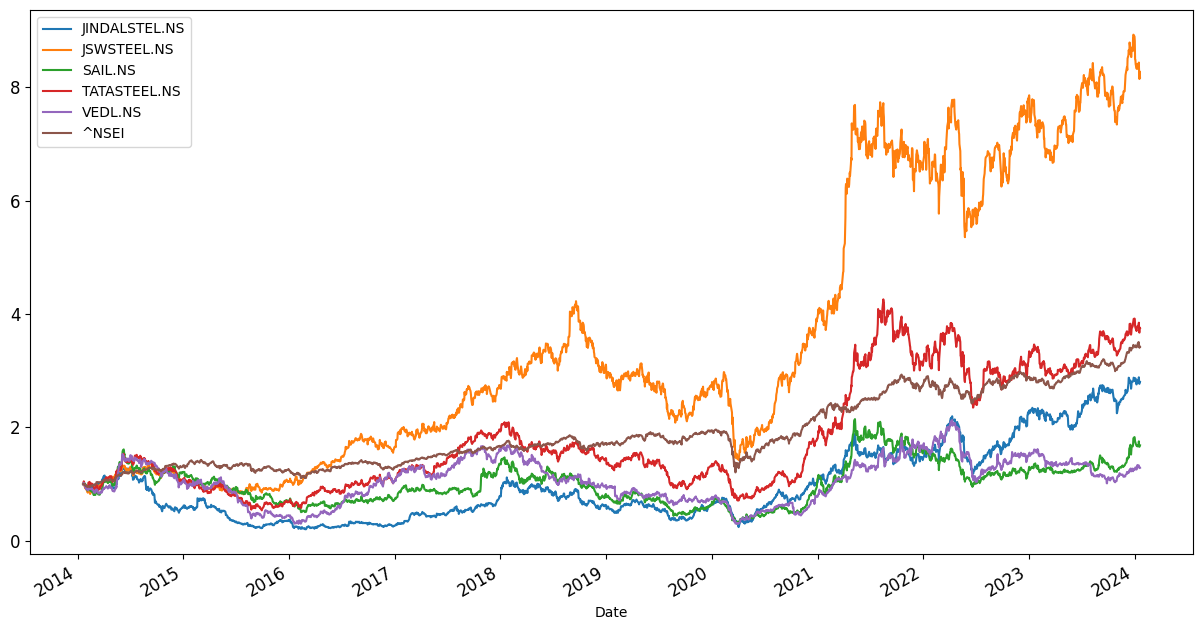

JINDALSTEL.NS    5.329387
JSWSTEEL.NS      2.660793
SAIL.NS          3.866989
TATASTEEL.NS     2.988631
VEDL.NS          3.809820
^NSEI            1.000000
dtype: float64


c:\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [81]:
# Comparing the normalized returns, risk and risk adjusted returns of various stocks in the portfolio
normalized_close = Portfolio.div(Portfolio.iloc[0])
normalized_close.plot(figsize=(15, 8), fontsize=12)
plt.show()
# Calculating the beta parameter, using the nifty-index as the standard to calculate the risk
b = (Portfolio_corr['^NSEI'])*(np.var(Portfolio_return) /
                               (np.var(Portfolio_return['^NSEI'])))
print(b)

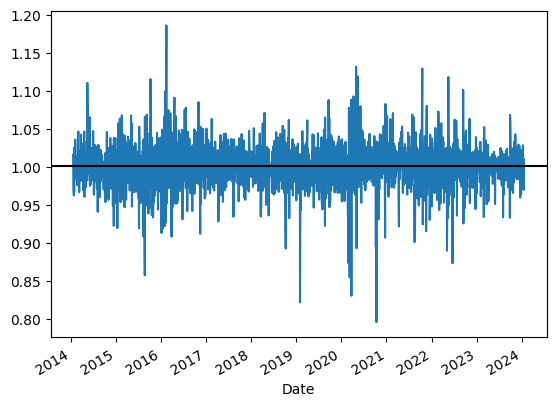

In [82]:
Portfolio_return['VEDL.NS'].plot()
dev = np.square(Portfolio_return['VEDL.NS']-Portfolio_return['VEDL.NS'].mean())
standard_deviation = np.sqrt((dev.sum())/len(Portfolio_return))
mean = Portfolio_return['VEDL.NS'].mean()
mean
plt.axhline(y=mean, xmin=0,
            xmax=Portfolio_return['VEDL.NS'].max(), color='black')

STANDARD DEVIATIONS OF VEDANTA
1.0005009824892621 0.02809284903591911 5.618569807183822 8.427854710775733
STANDARD DEVIATIONS OF STOCKS
JINDALSTEL.NS    0.032845
JSWSTEEL.NS      0.021902
SAIL.NS          0.027563
TATASTEEL.NS     0.023452
VEDL.NS          0.028093
^NSEI            0.010411
dtype: float64
VARIANCE OF STOCKS
JINDALSTEL.NS    0.001079
JSWSTEEL.NS      0.000480
SAIL.NS          0.000760
TATASTEEL.NS     0.000550
VEDL.NS          0.000789
^NSEI            0.000108
dtype: float64


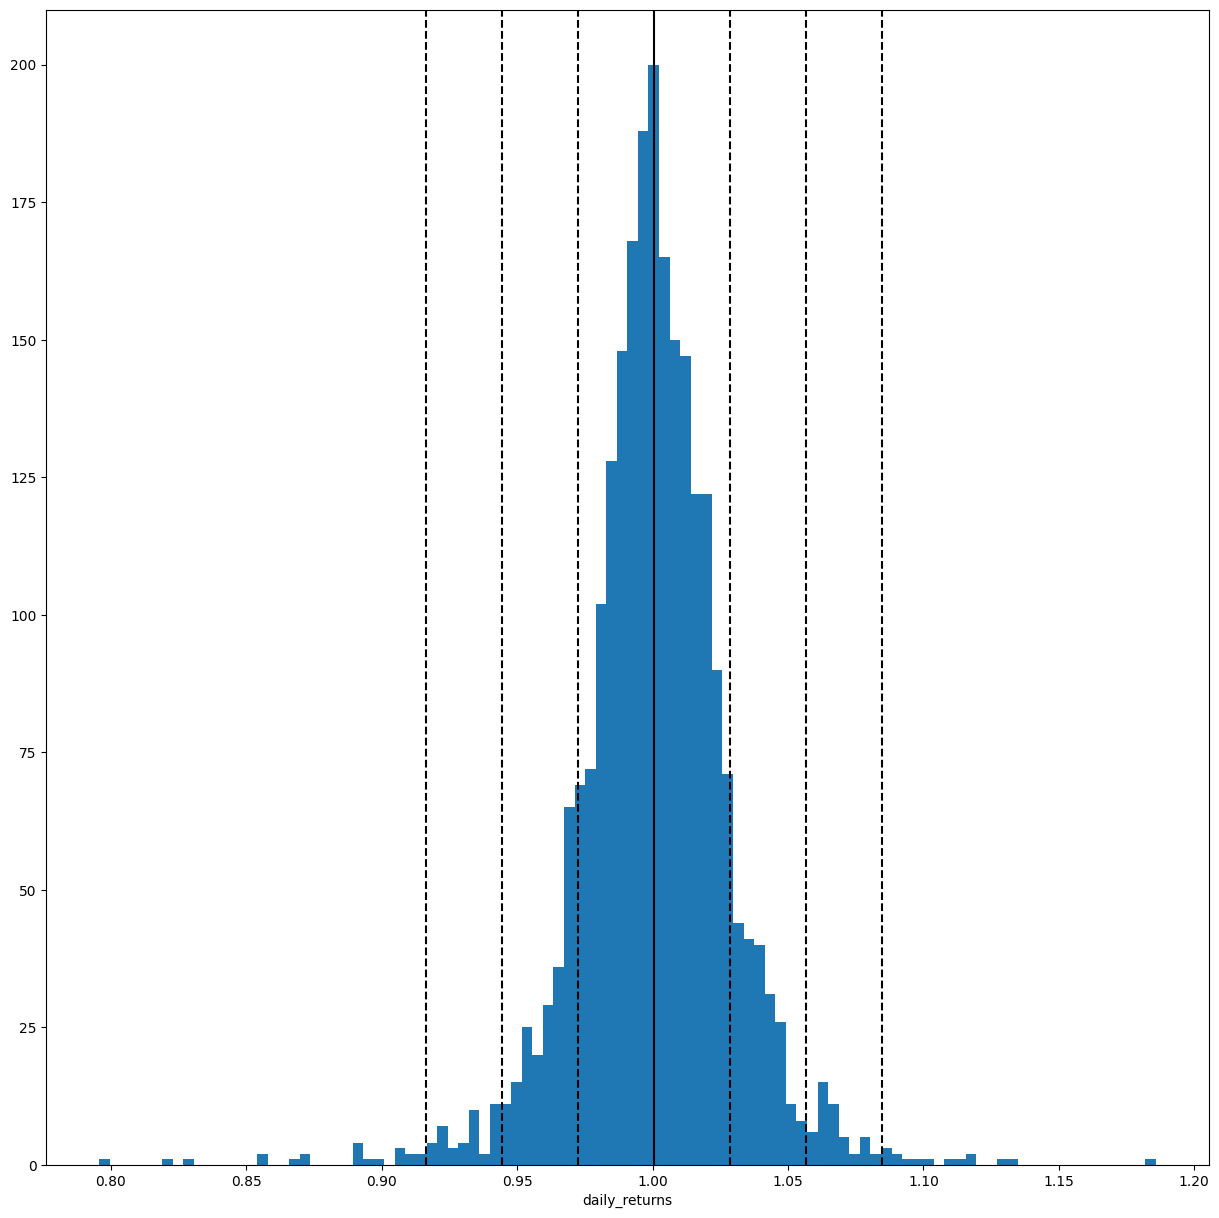

In [83]:
# Printing the standard deviations from the mean, the return distrubutions are approximately normal (dont kill me :))
plt.figure(figsize=(15, 15))

plt.hist(Portfolio_return['VEDL.NS'], bins=100)

plt.xlabel('daily_returns')

avg = Portfolio_return['VEDL.NS'].mean()

plt.axvline(x=avg, ymin=0,
            ymax=Portfolio_return['VEDL.NS'].max(), color='black')
for i in range(1, 4):
    plt.axvline(x=(avg+i*Portfolio_return['VEDL.NS'].std()), ymin=0,
                ymax=Portfolio_return['VEDL.NS'].max(), color='black', ls='--')
    plt.axvline(x=(avg-i*Portfolio_return['VEDL.NS'].std()), ymin=0,
                ymax=Portfolio_return['VEDL.NS'].max(), color='black', ls='--')

std = Portfolio_return['VEDL.NS'].std()
print("STANDARD DEVIATIONS OF VEDANTA")
print(avg, std, 2*std*100, 3*std*100)
print("STANDARD DEVIATIONS OF STOCKS")
print(Portfolio_return.std())
print("VARIANCE OF STOCKS")
print(Portfolio_return.var())

In [84]:
# Calculating some basic probabilities
# Probabilities that stock has rebounded after crossing the 1-standard deviation threshold
# Number of times a stock has crossed one standard threshold and so on...
# If a stock has shown an movement of one standard deviation from mean returns then the probability of a reverse movement on the consecutive day
# If a stock has shown an movement of two standard deviation from mean returns then the probability of a reverse movement of two standard deviations or more on the consecutive day
def round_num(x):  # function to round numbers to near n as specified
    return (round(x*40)/40)


days = 0
days_c = 0
days_p = 0
days_p1 = 0
for i in range(len(Portfolio_return)):
    if ((Portfolio_return.iloc[i, 3] >= (avg + Portfolio_return['TATASTEEL.NS'].std())) and (Portfolio_return.iloc[i, 3] <= (avg + 2*Portfolio_return['TATASTEEL.NS'].std()))):
        days += 1
        if ((Portfolio_return.iloc[i+1, 3]) < 1):
            days_p += 1
    if (Portfolio_return.iloc[i, 3] <= (avg - Portfolio_return['TATASTEEL.NS'].std()) and Portfolio_return.iloc[i, 3] >= (avg - 2*Portfolio_return['TATASTEEL.NS'].std())):
        days += 1
        if ((Portfolio_return.iloc[i+1, 3]) > 1):
            days_p += 1
    if (Portfolio_return.iloc[i, 3] >= ((avg + 2*Portfolio_return['TATASTEEL.NS'].std()))):
        days_c += 1
        if ((Portfolio_return.iloc[i+1, 3]) < 1):
            days_p1 += 1
    if (Portfolio_return.iloc[i, 3] <= ((avg - 2*Portfolio_return['TATASTEEL.NS'].std()))):
        days_c += 1
        if ((Portfolio_return.iloc[i+1, 3]) > 1):
            days_p1 += 1
print(len(Portfolio_return), days, days_c)
probabilty = [days_p/days, days_p1/days_c]
print(probabilty)

2467 480 140
[0.53125, 0.5928571428571429]


In [85]:
# Repeating the same process with vedanta, (sorry about the efficiency: there's none), will mostly write a basic function to carry out this process with bunch of other parameters
days = 0
days_c = 0
days_p = 0
days_p1 = 0
for i in range(len(Portfolio_return)):
    if ((Portfolio_return.iloc[i, 4] >= (avg + Portfolio_return['VEDL.NS'].std())) and (Portfolio_return.iloc[i, 4] <= (avg + 2*Portfolio_return['VEDL.NS'].std()))):
        days += 1
        if ((Portfolio_return.iloc[i+1, 4]) < 1):
            days_p += 1
    if (Portfolio_return.iloc[i, 4] <= (avg - Portfolio_return['VEDL.NS'].std()) and Portfolio_return.iloc[i, 4] >= (avg - 2*Portfolio_return['VEDL.NS'].std())):
        days += 1
        if ((Portfolio_return.iloc[i+1, 4]) > 1):
            days_p += 1
    if (Portfolio_return.iloc[i, 4] >= ((avg + 2*Portfolio_return['VEDL.NS'].std()))):
        days_c += 1
        if ((Portfolio_return.iloc[i+1, 4]) < 1):
            days_p1 += 1
    if (Portfolio_return.iloc[i, 4] <= ((avg - 2*Portfolio_return['VEDL.NS'].std()))):
        days_c += 1
        if ((Portfolio_return.iloc[i+1, 4]) > 1):
            days_p1 += 1
print(len(Portfolio_return), days, days_c)
probabilty = [days_p/days, days_p1/days_c]
print(probabilty)

2467 440 126
[0.509090909090909, 0.5158730158730159]


In [86]:
days = 0
days_c = 0
days_p = 0
days_p1 = 0
for i in range(len(Portfolio_return)):
    if ((Portfolio_return.iloc[i, 0] >= (avg + Portfolio_return['JINDALSTEL.NS'].std())) and (Portfolio_return.iloc[i, 0] <= (avg + 2*Portfolio_return['JINDALSTEL.NS'].std()))):
        days += 1
        if ((Portfolio_return.iloc[i+1, 0]) < 1):
            days_p += 1
    if (Portfolio_return.iloc[i, 0] <= (avg - Portfolio_return['JINDALSTEL.NS'].std()) and Portfolio_return.iloc[i, 0] >= (avg - 2*Portfolio_return['JINDALSTEL.NS'].std())):
        days += 1
        if ((Portfolio_return.iloc[i+1, 0]) > 1):
            days_p += 1
    if (Portfolio_return.iloc[i, 0] >= ((avg + 2*Portfolio_return['JINDALSTEL.NS'].std()))):
        days_c += 1
        if ((Portfolio_return.iloc[i+1, 0]) < 1):
            days_p1 += 1
    if (Portfolio_return.iloc[i, 0] <= ((avg - 2*Portfolio_return['JINDALSTEL.NS'].std()))):
        days_c += 1
        if ((Portfolio_return.iloc[i+1, 0]) > 1):
            days_p1 += 1
print(len(Portfolio_return), days, days_c)
probabilty = [days_p/days, days_p1/days_c]
print(probabilty)

2467 475 128
[0.5431578947368421, 0.5703125]


In [87]:
days = 0
days_c = 0
days_p = 0
days_p1 = 0
for i in range(len(Portfolio_return)):
    if ((Portfolio_return.iloc[i, 1] >= (avg + Portfolio_return['JSWSTEEL.NS'].std())) and (Portfolio_return.iloc[i, 1] <= (avg + 2*Portfolio_return['JSWSTEEL.NS'].std()))):
        days += 1
        if ((Portfolio_return.iloc[i+1, 1]) < 1):
            days_p += 1
    if (Portfolio_return.iloc[i, 1] <= (avg - Portfolio_return['JSWSTEEL.NS'].std()) and Portfolio_return.iloc[i, 1] >= (avg - 2*Portfolio_return['JSWSTEEL.NS'].std())):
        days += 1
        if ((Portfolio_return.iloc[i+1, 1]) > 1):
            days_p += 1
    if (Portfolio_return.iloc[i, 1] >= ((avg + 2*Portfolio_return['JSWSTEEL.NS'].std()))):
        days_c += 1
        if ((Portfolio_return.iloc[i+1, 1]) < 1):
            days_p1 += 1
    if (Portfolio_return.iloc[i, 1] <= ((avg - 2*Portfolio_return['JSWSTEEL.NS'].std()))):
        days_c += 1
        if ((Portfolio_return.iloc[i+1, 1]) > 1):
            days_p1 += 1
print(len(Portfolio_return), days, days_c)
probabilty = [days_p/days, days_p1/days_c]
print(probabilty)

2467 509 119
[0.5540275049115914, 0.6470588235294118]
